# Event Study

While Alphalens is a tool designed to evaluate a cross-sectional signal which can be used to rank many securities each day, we can still make use of Alphalens returns analysis functions, a subset of Alphalens, to create a meaningful event study.

An event study is a statistical method to assess the impact of a particular event on the value of a stock. In this example we will evalute what happens to stocks whose price fall below 30$

# Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import alphalens
import pandas as pd

In [3]:
%matplotlib inline

# Load Data

Below is a simple mapping of tickers to sectors for a universe of 500 large cap stocks.

In [4]:
tickers = ['ACN', 'ATVI', 'ADBE', 'AMD', 'AKAM', 'ADS', 'GOOGL', 'GOOG', 'APH', 'ADI', 'ANSS', 'AAPL',
           'AVGO', 'CA', 'CDNS', 'CSCO', 'CTXS', 'CTSH', 'GLW', 'CSRA', 'DXC', 'EBAY', 'EA', 'FFIV', 'FB',
           'FLIR', 'IT', 'GPN', 'HRS', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'JNPR', 'KLAC', 'LRCX', 'MA', 'MCHP',
           'MSFT', 'MSI', 'NTAP', 'NFLX', 'NVDA', 'ORCL', 'PAYX', 'PYPL', 'QRVO', 'QCOM', 'RHT', 'CRM', 'STX',
           'AMG', 'AFL', 'ALL', 'AXP', 'AIG', 'AMP', 'AON', 'AJG', 'AIZ', 'BAC', 'BK', 'BBT', 'BRK.B', 'BLK', 'HRB',
           'BHF', 'COF', 'CBOE', 'SCHW', 'CB', 'CINF', 'C', 'CFG', 'CME', 'CMA', 'DFS', 'ETFC', 'RE', 'FITB', 'BEN',
           'GS', 'HIG', 'HBAN', 'ICE', 'IVZ', 'JPM', 'KEY', 'LUK', 'LNC', 'L', 'MTB', 'MMC', 'MET', 'MCO', 'MS',
           'NDAQ', 'NAVI', 'NTRS', 'PBCT', 'PNC', 'PFG', 'PGR', 'PRU', 'RJF', 'RF', 'SPGI', 'STT', 'STI', 'SYF', 'TROW',
           'ABT', 'ABBV', 'AET', 'A', 'ALXN', 'ALGN', 'AGN', 'ABC', 'AMGN', 'ANTM', 'BCR', 'BAX', 'BDX', 'BIIB', 'BSX',
           'BMY', 'CAH', 'CELG', 'CNC', 'CERN', 'CI', 'COO', 'DHR', 'DVA', 'XRAY', 'EW', 'EVHC', 'ESRX', 'GILD', 'HCA',
           'HSIC', 'HOLX', 'HUM', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'IQV', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MRK', 'MTD',
           'MYL', 'PDCO', 'PKI', 'PRGO', 'PFE', 'DGX', 'REGN', 'RMD', 'SYK', 'TMO', 'UNH', 'UHS', 'VAR', 'VRTX', 'WAT',
           'MMM', 'AYI', 'ALK', 'ALLE', 'AAL', 'AME', 'AOS', 'ARNC', 'BA', 'CHRW', 'CAT', 'CTAS', 'CSX', 'CMI', 'DE',
           'DAL', 'DOV', 'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FLS', 'FLR', 'FTV', 'FBHS', 'GD', 'GE', 'GWW',
           'HON', 'INFO', 'ITW', 'IR', 'JEC', 'JBHT', 'JCI', 'KSU', 'LLL', 'LMT', 'MAS', 'NLSN', 'NSC', 'NOC', 'PCAR',
           'PH', 'PNR', 'PWR', 'RTN', 'RSG', 'RHI', 'ROK', 'COL', 'ROP', 'LUV', 'SRCL', 'TXT', 'TDG', 'UNP', 'UAL',
           'AES', 'LNT', 'AEE', 'AEP', 'AWK', 'CNP', 'CMS', 'ED', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'ES', 'EXC']

## YFinance Download

In [5]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

df = web.get_data_yahoo(tickers, start='2015-06-01',  end='2017-01-01')
df.index = pd.to_datetime(df.index)

[*********************100%***********************]  247 of 247 completed

19 Failed downloads:
- CELG: No data found, symbol may be delisted
- LLL: No data found, symbol may be delisted
- HRS: No data found, symbol may be delisted
- BCR: No data found for this date range, symbol may be delisted
- MYL: No data found, symbol may be delisted
- AGN: No data found, symbol may be delisted
- ARNC: Data doesn't exist for startDate = 1433134800, endDate = 1483250400
- ETFC: No data found, symbol may be delisted
- IR: Data doesn't exist for startDate = 1433134800, endDate = 1483250400
- JEC: No data found, symbol may be delisted
- STI: No data found, symbol may be delisted
- LUK: No data found for this date range, symbol may be delisted
- RHT: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- BBT: No data found, symbol may be delisted
- FLIR: No data found, symbol may be delisted
- VAR: No data found, symbol may be delisted
- BHF: Data doesn't exist for start

## Data Formatting

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 403 entries, 2015-06-01 to 2016-12-30
Columns: 1482 entries, ('Adj Close', 'A') to ('Volume', 'XRAY')
dtypes: float64(1482)
memory usage: 4.6 MB


In [7]:
df = df.stack()
df.index.names = ['date', 'asset']
df = df.tz_localize('UTC', level='date')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 91072 entries, (Timestamp('2015-06-01 00:00:00+0000', tz='UTC'), 'A') to (Timestamp('2016-12-30 00:00:00+0000', tz='UTC'), 'XRAY')
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  91072 non-null  float64
 1   Close      91072 non-null  float64
 2   High       91072 non-null  float64
 3   Low        91072 non-null  float64
 4   Open       91072 non-null  float64
 5   Volume     91072 non-null  float64
dtypes: float64(6)
memory usage: 4.5+ MB


# Factor Computation

Now it's time to build the events DataFrame, the input we will pass to Alphalens.

Alphalens calculates statistics for those dates where the input DataFrame has values (not NaN). So to compute the performace analysis on specific dates and securities (like an event study) then we have to make sure the input DataFrame contains valid values only on those date/security combinations where the event happens. All the other values in the DataFrame must be NaN or not present.

Also, make sure the event values are positive (it doesn't matter the value but they must be positive) if you intend to go long on the events and use negative values if you intent to go short. This impacts the cumulative returns plots. 

Let's create the event DataFrame where we "mark" (any value) each day a security price fall below 30$. 

In [9]:
today_price = df.loc[:, 'Open'].unstack('asset')
yesterday_price = today_price.shift(1)
events = today_price[(today_price < 30.0) & (yesterday_price >= 30)]
events = events.stack()
events = events.astype(float)
events

date                       asset
2015-06-04 00:00:00+00:00  LNT      29.645000
                           PWR      29.850000
2015-06-12 00:00:00+00:00  CA       29.830000
2015-06-18 00:00:00+00:00  PWR      29.870001
2015-06-25 00:00:00+00:00  PWR      29.629999
                                      ...    
2016-12-06 00:00:00+00:00  GE       29.990385
2016-12-07 00:00:00+00:00  PFE      29.724857
2016-12-09 00:00:00+00:00  CSCO     29.980000
2016-12-13 00:00:00+00:00  EW       29.476667
2016-12-14 00:00:00+00:00  EBAY     29.850000
Length: 148, dtype: float64

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after an event was observed at a given timestamp. Those prices must not be used in the calculation of the events for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestats will be used and so on.

While Alphalens is time frequency agnostic, in our example we build 'pricing' DataFrame so that for each event timestamp it contains the assets open price for the next day afer the event is detected, this price will be used as the assets entry price. Also, we are not adding additional prices so the assets exit price will be the following days open prices (how many days depends on 'periods' argument).

In [10]:
pricing = df.loc[:, 'Open'].iloc[1:].unstack('asset')

In [11]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 402 entries, 2015-06-01 00:00:00+00:00 to 2016-12-30 00:00:00+00:00
Columns: 228 entries, AAL to FTV
dtypes: float64(228)
memory usage: 719.2 KB


# Run Event Study

## Configuration

Before running Alphalens beware of some important options: 

In [12]:
# we don't want any filtering to be done

filter_zscore = None

In [13]:
# We want to have only one  bin/quantile. So we can either use quantiles=1 or bins=1

quantiles = None
bins = 1

# Beware that in pandas versions below 0.20.0 there were few bugs in panda.qcut and pandas.cut
# that resulted in ValueError exception to be thrown when identical values were present in the
# dataframe and 1 quantile/bin was selected.
# As a workaroung use the bins custom range option that include all your values. E.g.

quantiles = None
bins = [-1000000, 1000000]

In [14]:
# You don't have to directly set 'long_short' option when running alphalens.tears.create_event_study_tear_sheet
# But in case you are making use of other Alphalens functions make sure to set 'long_short=False'
# if you set 'long_short=True' Alphalens will perform forward return demeaning and that makes sense only
# in a dollar neutral portfolio. With an event style signal you cannot usually create a dollar neutral
# long/short portfolio

long_short = False

## Get Alphalens Input

In [15]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(events,
                                                                   pricing,
                                                                   quantiles=None,
                                                                   bins=1,
                                                                   periods=(
                                                                       1, 2, 3, 4, 5, 6, 10),
                                                                   filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


## Run Event Tearsheet

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,26.549999,29.990385,29.574573,0.534693,148,100.0


<Figure size 432x288 with 0 Axes>

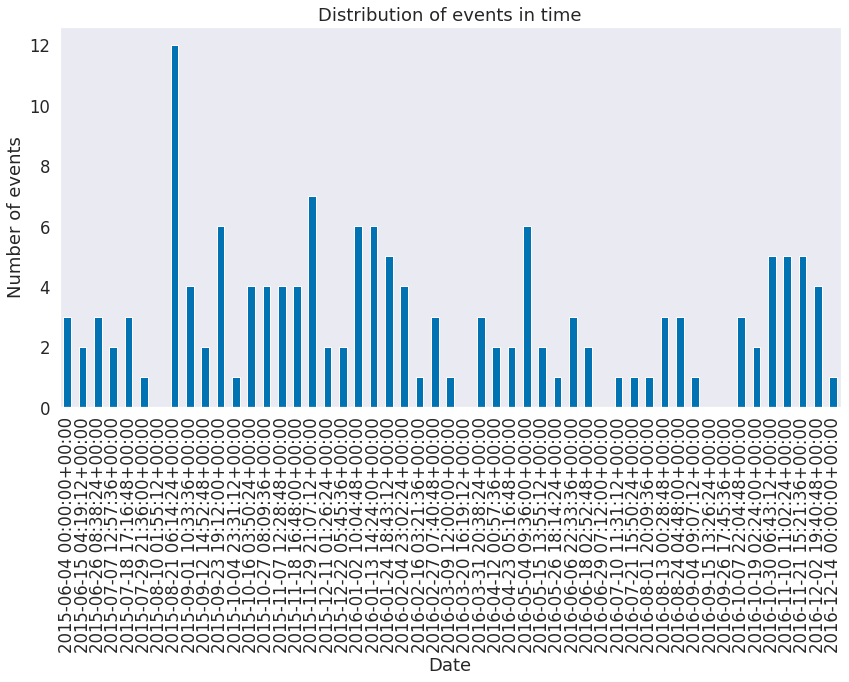

<Figure size 432x288 with 0 Axes>

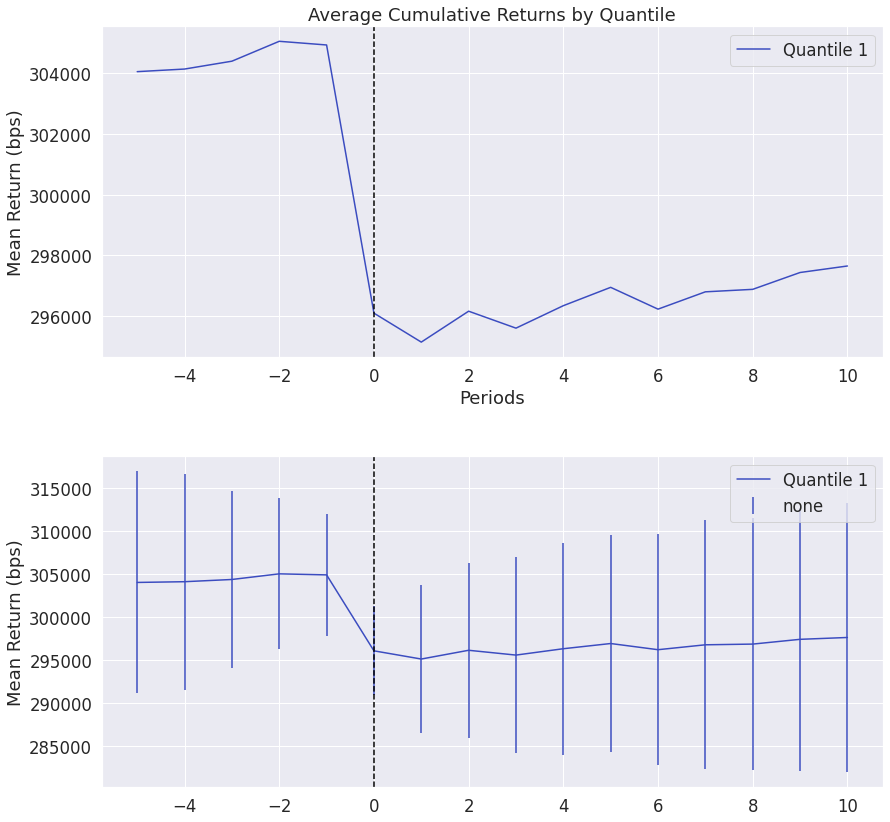

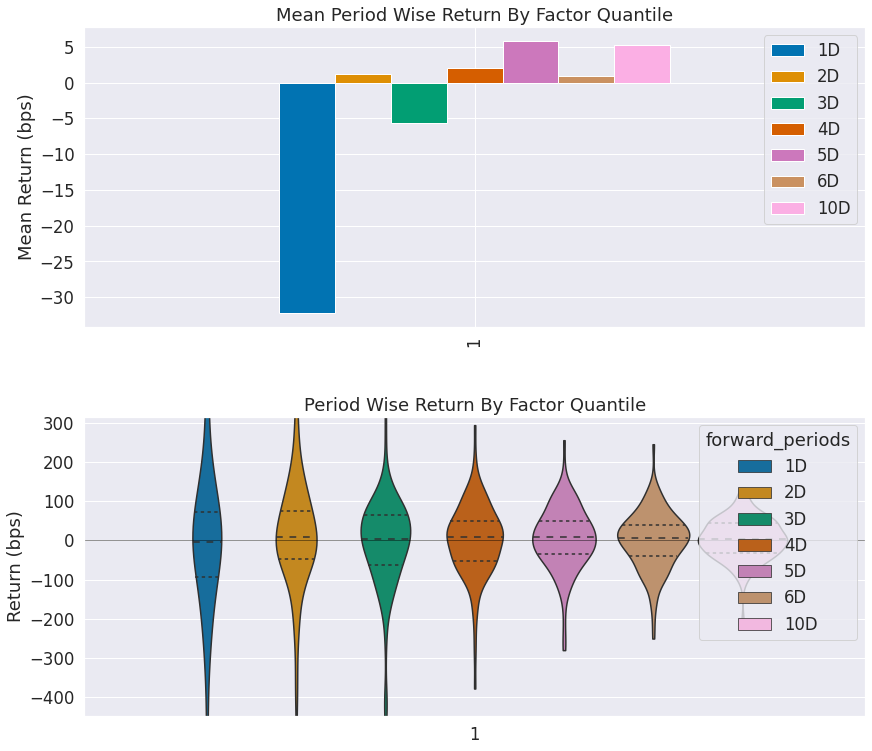

In [16]:
alphalens.tears.create_event_study_tear_sheet(factor_data, 
                                              pricing, 
                                              avgretplot=(5, 10));

## Short Signal Analysis

If we wanted to analyze the performance of  short signal, we only had to switch from positive to negative event values

In [17]:
events = -events

In [18]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(events,
                                                                   pricing,
                                                                   quantiles=None,
                                                                   bins=1,
                                                                   periods=(
                                                                       1, 2, 3, 4, 5, 6, 10),
                                                                   filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-29.990385,-26.549999,-29.574573,0.534693,148,100.0


<Figure size 432x288 with 0 Axes>

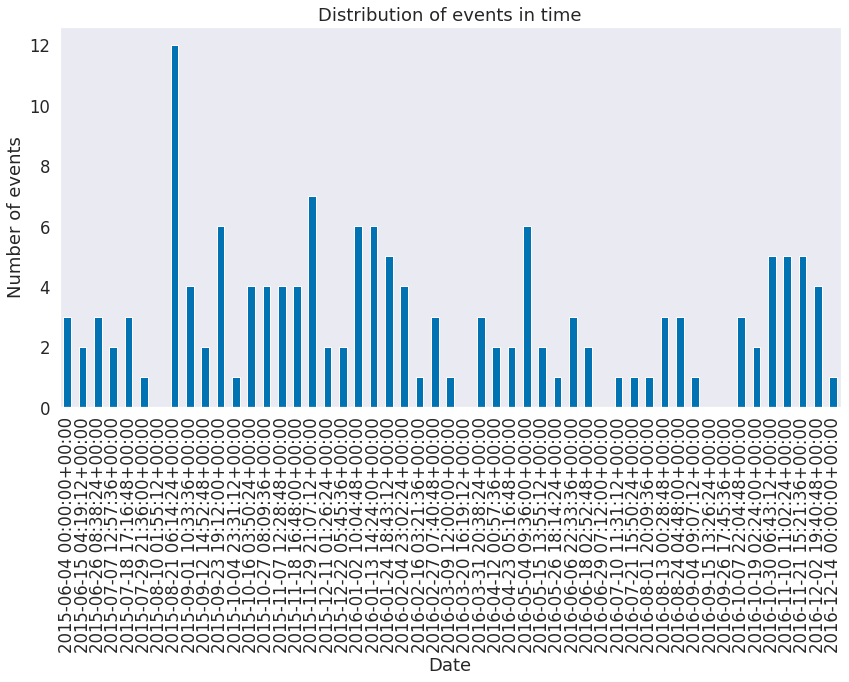

<Figure size 432x288 with 0 Axes>

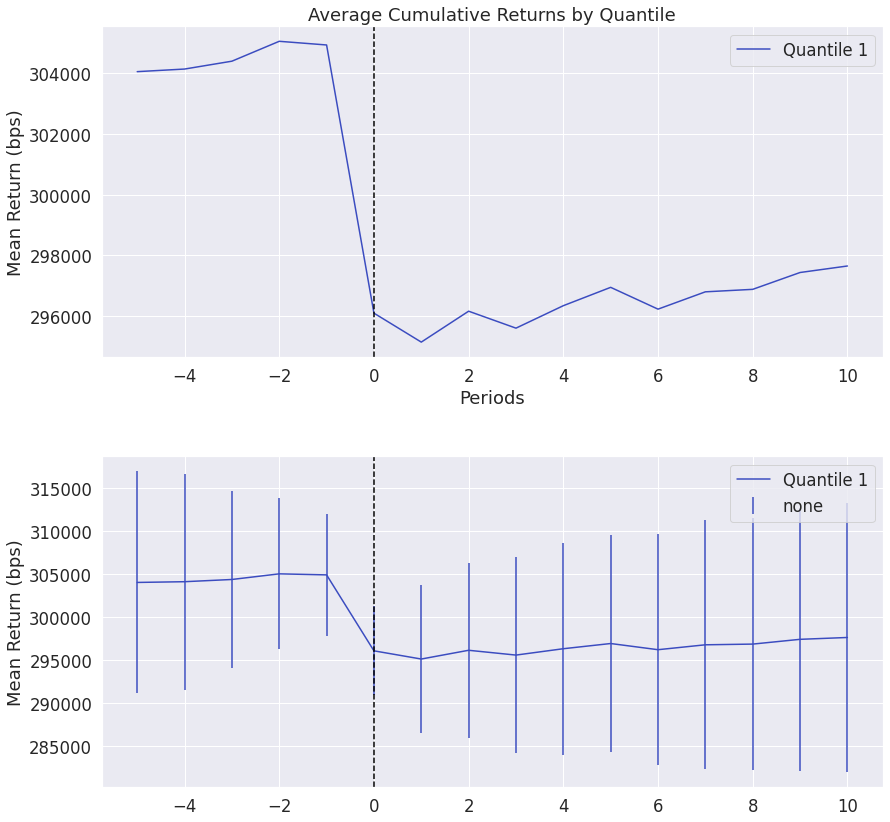

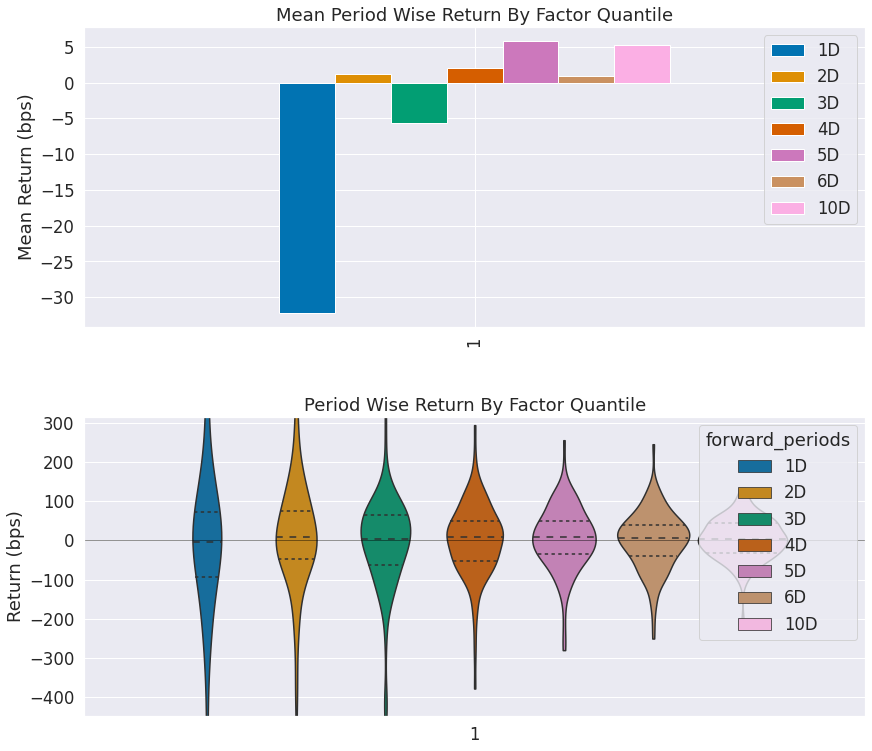

In [19]:
alphalens.tears.create_event_study_tear_sheet(factor_data, 
                                              pricing, 
                                              avgretplot=(5, 10));